# Google Colabを利用してますでしょうか？
以下のコードを実行してください。
- UPSTAGE_API_KEYを取得・書き換え

```sh
# 🔑 APIキー設定
# # https://console.upstage.ai/api-keys
import os
os.environ["UPSTAGE_API_KEY"] = "YOUR_API_KEY"
print("🔐 Upstage APIキーを設定しました")
```

他の設定は入りません。

In [ ]:
import os

# ===============================
# 🧪 weaveのインストール
# ===============================
print("📦 weave をインストール中...")
!pip install -q weave==0.52.9

# ===============================
# 🔑 Upstage APIキーの設定
# ===============================
# # https://console.upstage.ai/api-keys
os.environ["UPSTAGE_API_KEY"] = "YOUR_API_KEY"
print("🔐 Upstage APIキーを設定しました")

# ===============================
# 📁 パス設定
# ===============================
ZIP_URL = "https://github.com/nhandsome-new/fc_2025_upstage_handson/raw/main/prep_google_colab/demo_imgs.zip"
ZIP_FILE = "demo_imgs.zip"
EXTRACT_DIR = "/content/demo_imgs"

# ===============================
# 📂 フォルダがあるかチェック
# ===============================
if not os.path.exists(EXTRACT_DIR):
    print("📂 フォルダが存在しません。初回セットアップを開始します...")

    # 🧭 1) 既存のフォルダ・ZIPファイルを削除（存在しなくてもOK）
    print("🧭 既存のフォルダ・ZIPファイルを削除中...")
    !rm -rf {EXTRACT_DIR} || true
    !rm -f {ZIP_FILE} || true

    # ⬇️ 2) wgetでZIPファイルをダウンロード
    print(f"⬇️ ZIPファイルをダウンロード中: {ZIP_URL}")
    !wget -q -O {ZIP_FILE} {ZIP_URL}
    print("✅ ダウンロード完了")

    # 📦 3) ZIPファイルを解凍
    print("📦 ZIPファイルを解凍中...")
    !unzip -q {ZIP_FILE} -d .
    print("✅ 解凍完了")

    # 🧼 4) ZIPファイルを削除
    print("🧼 ZIPファイルを削除中...")
    !rm {ZIP_FILE}
    print("✅ ZIPファイル削除完了")

else:
    print("✅ 既にフォルダが存在するため、ダウンロードと解凍はスキップします。")

# ===============================
# 📂 展開結果の確認
# ===============================
print(f"📂 展開結果の確認: {EXTRACT_DIR}")
!ls -l {EXTRACT_DIR}


## 🧠 Embeddingモデルを用いた意味類似度スコアラーの実装

### 必要設定
```sh
pip install 'weave[scorers]'

os.environ["OPENAI_API_KEY"] = 'YOUR_API_KEY'
```

### 📝 背景
情報抽出結果を評価する際、以下のようなケースでは  
**完全一致（Exact Match）だけでは評価しきれない** ことがあります：

- 抽出対象が自然言語の文章である場合（例：「事故の内容」など）  
- 言い回しや語順が異なっても、意味としては同じケース  
- 一部の表記揺れ（句読点・助詞・省略表現）などがある場合

こうした場合に **意味の近さ** を評価するために、  
**Embeddingモデル** を用いたスコアラーを追加します。

---

### ⚡ 仕組み
- **Embeddingモデル** とは：  
  文章をベクトル（数値列）に変換し、**意味の近さ** を数値で測るモデル
- 近い意味を持つ文はベクトル空間上でも近くなるため、  
  類似度スコアを計算して判定することが可能
- 類似度が閾値（threshold）以上なら「意味的に一致」とみなします

---

### 🧪 実装例

```python
@weave.op(name=f"match_scorer_{datetime.now().strftime('%Y%m%d_%H%M%S')}")
def match_scorer(output: str, target: str) -> dict:
    """
    📌 完全一致を判定するスコアラー
    - 前後の空白を除去して文字列を比較
    - 一致すれば correct=True
    """
    correct = (str(output).strip() == str(target).strip())
    return {"correct": correct}

# Embeddingベースの意味類似スコアラー
# threshold（類似度の閾値）は用途に応じて調整可能
if "OPENAI_API_KEY" in os.environ:
    print("EmbeddingSimilarityScorer 利用")
    from weave.scorers import EmbeddingSimilarityScorer
    similarity_scorer = EmbeddingSimilarityScorer(
        model_id="openai/text-embedding-3-small",
        threshold=0.6,
        column_map={"target": "target"}
    )
    scorers = [match_scorer, similarity_scorer]
else:
    scorers = [match_scorer]
```

---

### 🧠 ポイント

- `match_scorer` 👉 完全一致での評価  
- `EmbeddingSimilarityScorer` 👉 意味的な一致を補完  
- `threshold` を調整することで厳しさをコントロール可能
  - 例：`0.6` → 意味が近ければ OK  
  - 例：`0.9` → 厳密に近い意味だけ許可
- `OPENAI_API_KEY` が必要（Embeddingモデル利用のため）

---

### 🏁 活用例

- 「転倒してけがをした」 vs 「段差でつまずいて転倒」  
  - ❌ 完全一致では NG  
  - ✅ Embedding 類似度スコアでは OK（意味が同じため）

- 「バイク事故による骨折」 vs 「バイクで転倒し骨折」  
  - ✅ 意味類似として認識可能

---

### ✅ まとめ

- 意味的な一致を評価に含めることで、  
  実務における **柔軟で実用的な評価** が可能になる
- 特に自然言語の抽出タスクでは  
  **Embedding スコアの活用が非常に有効** 💡



📚 ライブラリ準備完了!
🎯 Weaveが初期化されました - すべての処理が自動追跡されます
🔑 UPSTAGE_API_KEY: 設定済み

📄 
   ファイル名: _Himawari_Accident_Report.jpg
   サイズ: 1,525,481 バイト


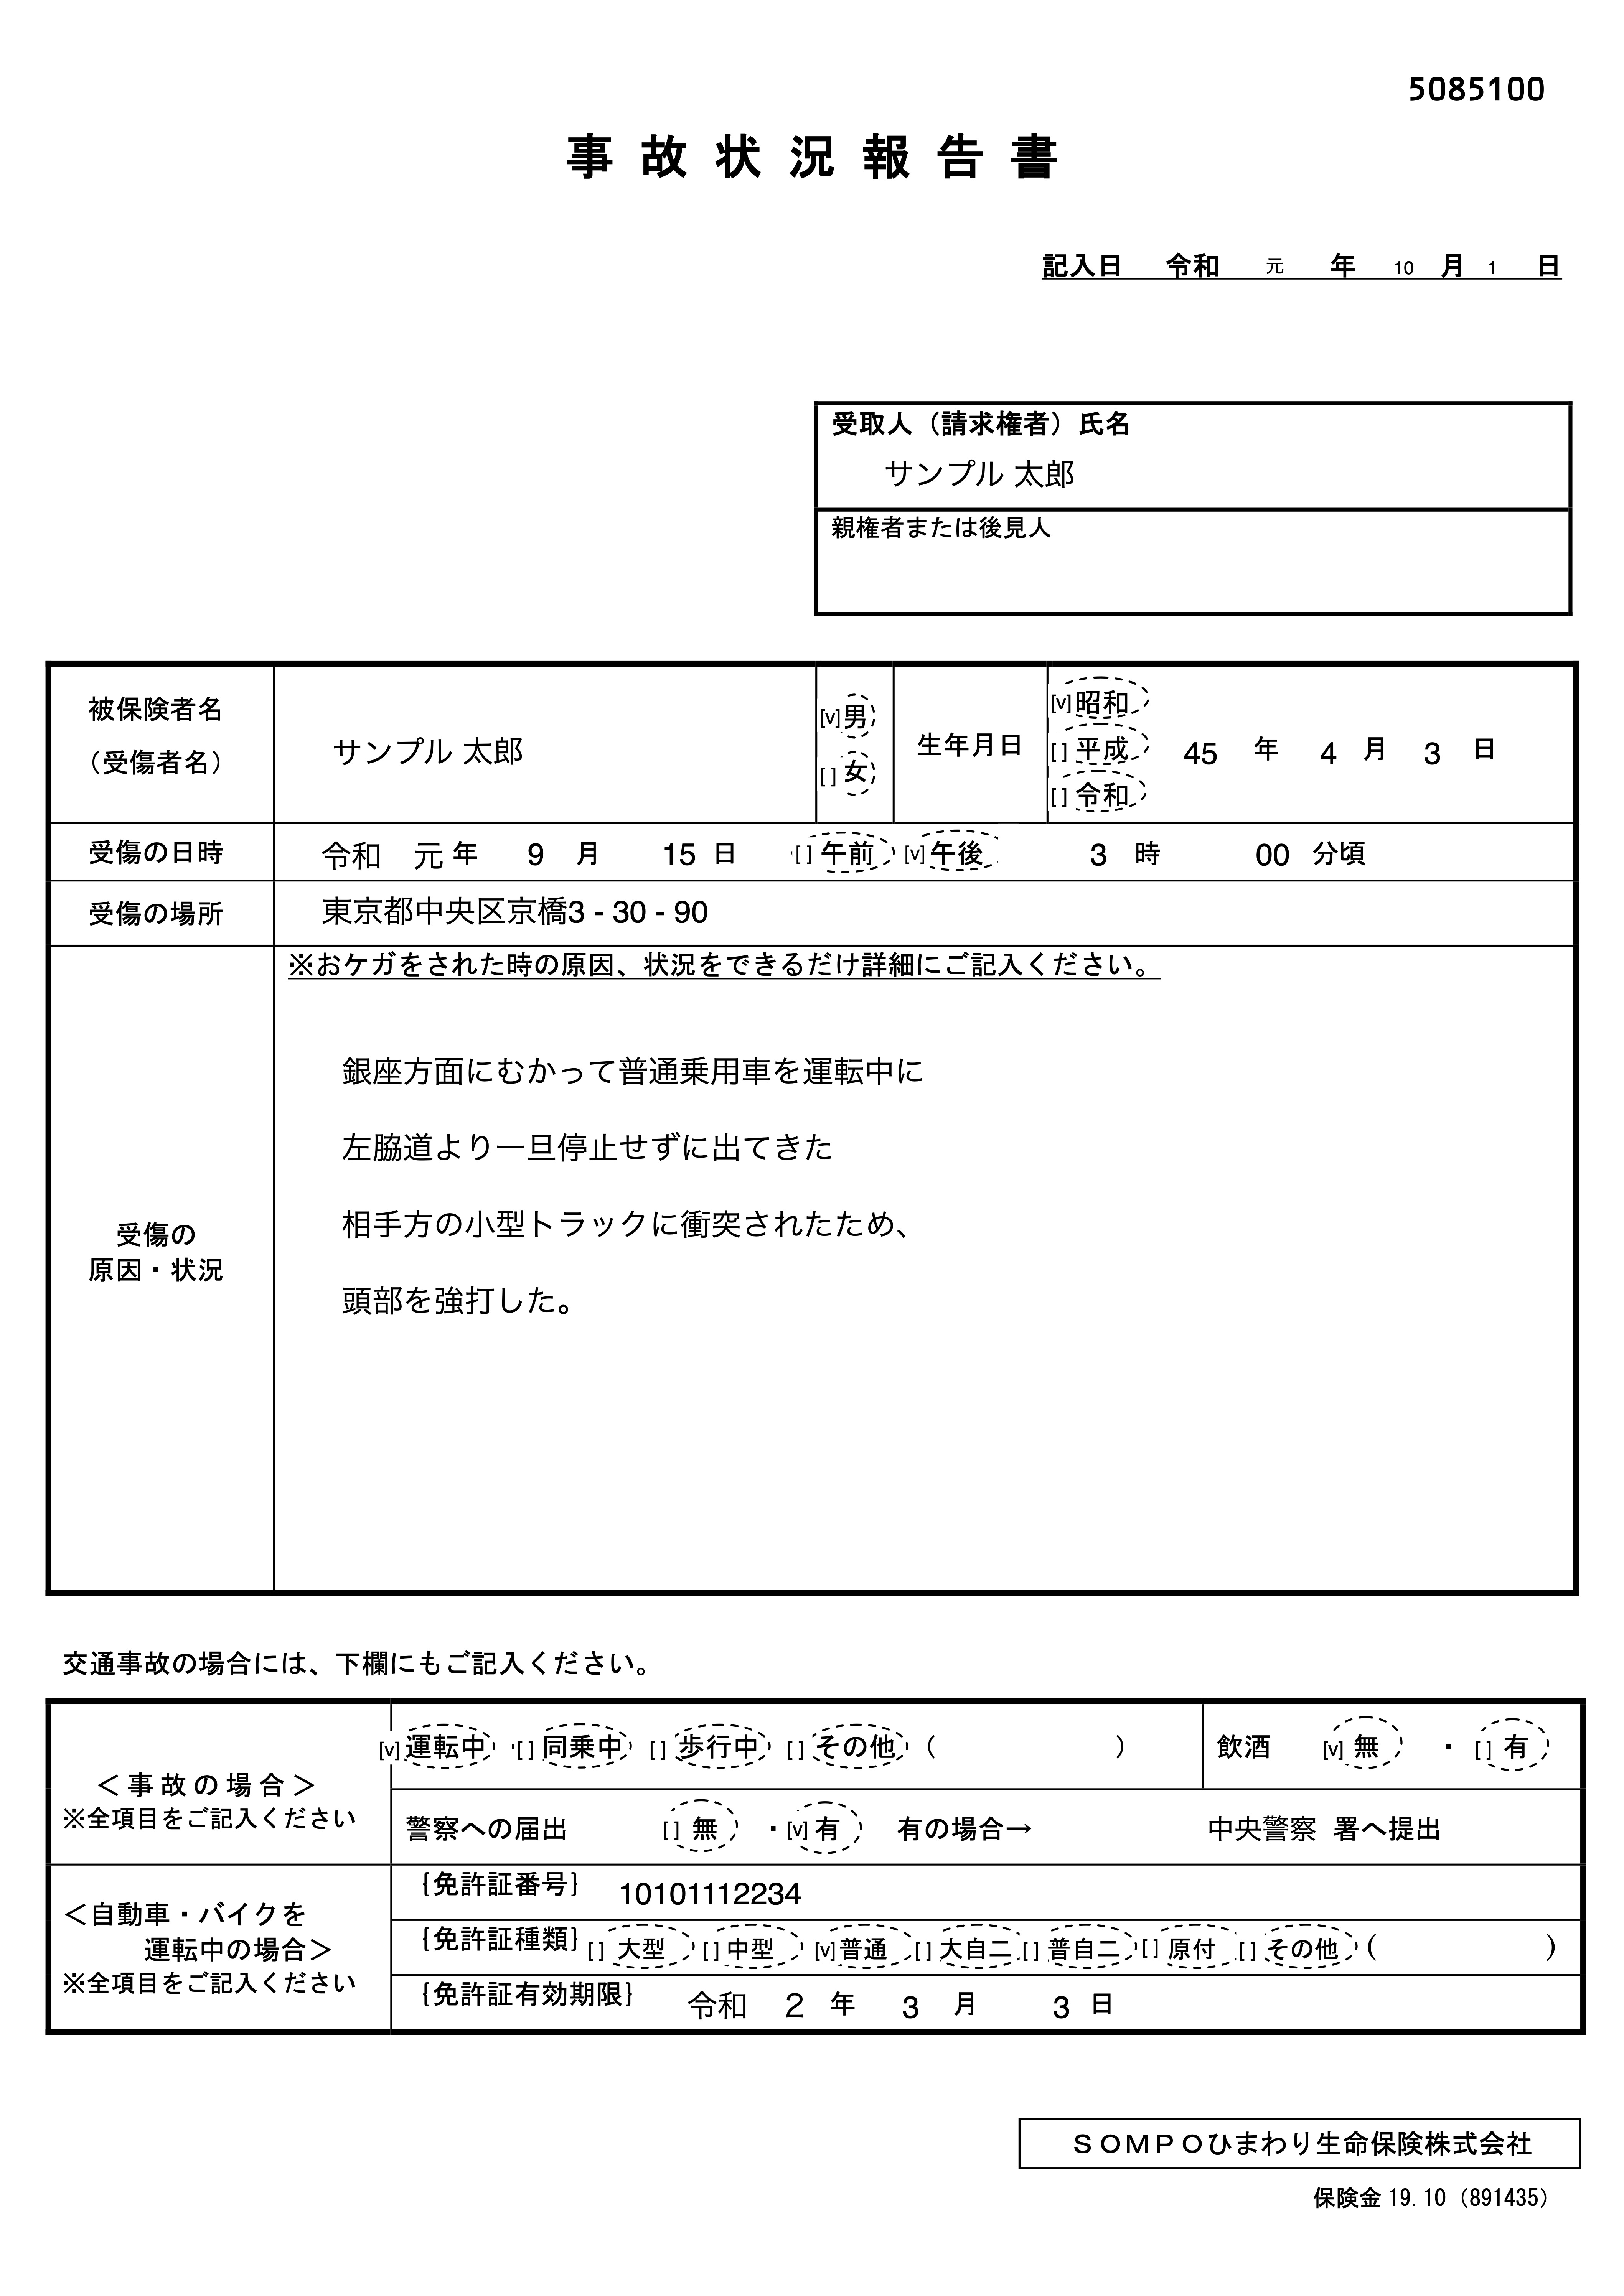

In [5]:
# ======================================================
# 📦 1. 必要なライブラリのインポート
# ======================================================
import weave
from weave import Content
import os
import re
import json
import requests
from datetime import datetime
from IPython.display import display, Image, HTML
from typing import Annotated

CACHE_DIR = "./dp_cache"
os.makedirs(CACHE_DIR, exist_ok=True)

# ======================================================
# 🚀 2. Weaveの初期化
# ======================================================
weave.init("UPSTAGE-HANDSON-STEP3-Plus")

# ======================================================
# 🔐 3. APIキーの設定
# https://console.upstage.ai/api-keys
# ======================================================
# os.environ["UPSTAGE_API_KEY"] = 'YOUR_API_KEY' # ← 実際のキーをここに入れる
# os.environ["OPENAI_API_KEY"] = 'YOUR_API_KEY' # ← 実際のキーをここに入れる

# ======================================================
# ✅ 4. 初期化確認
# ======================================================
print("📚 ライブラリ準備完了!")
print("🎯 Weaveが初期化されました - すべての処理が自動追跡されます")
print(f"🔑 UPSTAGE_API_KEY: {'設定済み' if 'UPSTAGE_API_KEY' in os.environ and os.environ['UPSTAGE_API_KEY'] != 'YOUR_API_KEY' else '❌未設定'}")

# ======================================================
# 🧾 5. Document Parse 関数
# ======================================================
@weave.op(name=f"document_parser_{datetime.now().strftime('%Y%m%d_%H%M%S')}")
def upstage_document_parse(file_path: Annotated[str, Content]) -> str:
    """
    📄 文書をHTMLに変換する関数
    - Upstage Document AI API を利用
    - ファイルを送信して OCR + HTML 化
    """
    # Step 1. APIキーを環境変数から取得
    api_key = os.environ.get("UPSTAGE_API_KEY")
    if not api_key:
        raise ValueError("❌ UPSTAGE_API_KEY が環境変数に設定されていません。")

    # Step 2. 画像ファイルをバイナリで読み込み
    with open(file_path, 'rb') as file:
        files = {
            "document": (os.path.basename(file_path), file, "image/jpeg")
        }
        data = {
            "model": "document-parse-nightly",
            "ocr": "auto",
            "output_formats": "html"
        }

        # Step 3. APIリクエスト送信
        response = requests.post(
            "https://api.upstage.ai/v1/document-ai/document-parse",
            headers={"Authorization": f"Bearer {api_key}"},
            files=files,
            data=data
        )

    # Step 4. 結果をJSONで取得してHTML部分を返す
    result = response.json()
    return result.get("content", {}).get("html", "")


# ======================================================
# ☀️ 6. LLM 応答生成関数
# ======================================================
@weave.op(name=f"llm_generator_{datetime.now().strftime('%Y%m%d_%H%M%S')}")
def upstage_solar_pro2(messages: list) -> str:
    """
    🧠 LLMで応答を生成する関数
    - Solar Pro2 モデルを使用
    - messages には system / user ロールのプロンプトを含む
    """
    # Step 1. APIキーを環境変数から取得
    api_key = os.environ.get("UPSTAGE_API_KEY")
    if not api_key:
        raise ValueError("❌ UPSTAGE_API_KEY が環境変数に設定されていません。")

    # Step 2. リクエストペイロードの構築
    payload = {
        "model": "solar-pro2",
        "messages": messages,
        "temperature": 0.1,
        "max_tokens": 10000
    }

    # Step 3. APIリクエスト送信
    response = requests.post(
        "https://api.upstage.ai/v1/solar/chat/completions",
        headers={
            "Authorization": f"Bearer {api_key}",
            "Content-Type": "application/json"
        },
        json=payload
    )

    # Step 4. 応答メッセージ部分のみを抽出して返す
    result = response.json()
    return result["choices"][0]["message"]["content"]


# ======================================================
# 🖼 7. ファイル情報の表示関数
# ======================================================
def display_document_info(file_path: str, title: str = ""):
    """
    📌 文書ファイルの基本情報を表示
    - ファイル名とサイズを出力
    - JPG/PNG形式の場合は画像を表示
    """
    if os.path.exists(file_path):
        # ファイル情報の出力
        print(f"\n📄 {title}")
        print(f"   ファイル名: {os.path.basename(file_path)}")
        print(f"   サイズ: {os.path.getsize(file_path):,} バイト")

        # 画像プレビュー（対応形式のみ）
        file_ext = os.path.splitext(file_path)[1].lower()
        if file_ext in ['.jpg', '.jpeg', '.png']:
            display(Image(file_path, width=300))
    else:
        print(f"❌ ファイルが見つかりません: {file_path}")

# ======================================================
# 🪜 8. JSON抽出関数
# ------------------------------------------------------
# - LLMの応答テキストから JSON フォーマット部分のみを抽出
# ======================================================
@weave.op(name=f"json_extractor_{datetime.now().strftime('%Y%m%d_%H%M%S')}")
def extract_json_from_llm_response(content: str):
    content = content.strip()
    match = re.search(r"```json\s*(\{[\s\S]*?\})\s*```", content)
    if match:
        content = match.group(1)
    return json.loads(content)


# ================================
# 🚀 メインパイプライン
# ================================

def process_document_pipeline(file_path: str, prompt1, prompt2, prompt3):
    # Step 1. ファイル情報の表示
    display_document_info(file_path, "対象文書")

    # Step 2. Document Parse
    print("\n📋 Document Parse中...")
    html_result = upstage_document_parse(file_path)

    # Step 3. LLMメッセージの組み立て
    messages = [
        {"role": "system", "content": "あなたはHTMLドキュメントを理解し、ユーザーの指示に従って処理します。必ず日本語で回答してください。"},
        {"role": "user", "content": f"# ドキュメント内容(HTML):\n{html_result}\n\n# プロンプト:\n{prompt1}"},
        {"role": "user", "content": f"前回結果をもとに次のタスク:\n{prompt2}"},
        {"role": "user", "content": f"前回結果をもとに次のタスク:\n{prompt3}"}
    ]

    # Step 4. LLM呼び出し
    print("\n🧠 LLM応答を生成中...")
    llm_result = upstage_solar_pro2(messages)

    # Step 5. JSON抽出
    print("\n📦 JSON抽出中...")
    try:
        result_json = extract_json_from_llm_response(llm_result)
        print("\n✅ 抽出結果（JSON）：")
        print(json.dumps(result_json, ensure_ascii=False, indent=2))
        return result_json
    except Exception as e:
        print(f"❌ JSON抽出に失敗しました: {e}")
        print("=== Raw LLM Result ===")
        print(llm_result)
        return None

# ================================
# ✨ 抽出プロンプト定義（自由に変更可能）
# --------------------------------
# LLMに対して情報抽出を段階的に指示するためのプロンプト。
# - Step 1：HTML構造の整理
# - Step 2：必要情報の定義
# - Step 3：出力形式の指定
# 
# 👉 これらを組み合わせることで、異なるテンプレートでも
#     安定した情報抽出結果を得られるようにする。
# ================================

# ------------------------------------------------------
# 🪜 PROMPT_1：情報抽出プロセスの段階化
# ------------------------------------------------------
PROMPT_1 = """
内容を変えずに、HTML内容を綺麗に整理して、新たなHTMLコードを作成してください。
- 必要な内容
  - 受傷者の情報
  - 受傷（事故）の情報
  - 免許証の情報
"""

# ------------------------------------------------------
# 🪜 PROMPT_2：必要情報の明確な定義
# ------------------------------------------------------
PROMPT_2 = """
情報が明確に記載されていない場合は、「記載無し」 と記載してください。
不明確な推測は行わず、記載内容のみに基づいて抽出してください。

-「受傷者住所」は 番地を含めない
-「受傷の場所」は 番地を含める
- 日付は 西暦（YYYY/MM/DD） で表記する
-「受傷の原因」「受傷の内容」は抽出情報から分けて整理する
- 時刻は 24時間表記（HH:mm）
"""

# ------------------------------------------------------
# 🪜 PROMPT_3：出力形式の定義
# ------------------------------------------------------
PROMPT_3 = """
ドキュメント内容を見て、以下のフォーマットに従って JSON形式で標準化された情報を出力してください。

{
  "受傷者名前": "山田 太郎",
  "受傷者性別": "男",
  "受傷者生年月日": "1990/05/12",
  "受傷者住所": "福岡県福岡市中央区",
  "受傷の日時/日付": "2025/10/10",
  "受傷の日時/時間": "14:35",
  "受傷の場所": "福岡県福岡市博多区博多駅前3-4-5",
  "受傷の原因": "通勤中に段差で転倒",
  "受傷の内容": "右ひじ擦過傷",
  "飲酒の有無": "無",
  "警察の届出/有無": "有",
  "警察の届出/警察署名": "福岡警察署",
  "免許証番号": "123456789012",
  "免許証種類": "原付",
  "免許有効期間": "2027/05/12"
}
"""

# ======================================================
# 🪜 Step ① 解析対象ファイルの定義
# ======================================================
sample_files = [
    "./demo_imgs/information_extraction/_Himawari_Accident_Report.jpg",
]
sample_file = sample_files[0]

display_document_info(sample_file)


![](./docs_imgs/Step_3.png)
## 🧪 情報抽出結果の評価と改善サイクルの構築

### 🧠 背景
これまでのステップで、**多様なテンプレートに対応し、担当者が必要とする情報を自動抽出するパイプライン** を構築し、初期的な実験を行いました。  
これにより、情報抽出というタスクの **「半分」** は達成できています。

しかし本当に業務で使えるレベルにするためには、  
抽出結果が「正しい」かどうかを **評価・検証** し、改善につなげる必要があります。

---

### 🧭 なぜ評価が必要か
抽出結果が業務要件を満たしているかを判断するためには、  
抽出結果と **正解データ（評価ラベル）** を比較する必要があります。

ここで確認したいのは次のような点です：

- 表記方法が正しいか（例：日付形式・住所表記の統一）  
- 出力形式が適切か（例：JSON構造・フィールド名）  
- 不要な後処理が発生していないか  
- **そもそも正しい情報が抽出できているか**

この一連の流れを「評価プロセス」と呼び、  
その結果をもとにモデル改善・データ修正・収集方針の見直しなどが行われます。  
この段階まで進むことで、AI活用の完成度が大きく高まります。

---

### ⚠️ 評価が難しい理由
- 評価対象が多いと **人力の確認作業** が必要になる  
- 人間の確認には **ミス** が発生しやすい  
- 項目数が増えるほど **コスト** がかかる  
- **バージョン管理が煩雑** になり、再現性も下がる

---

### 🧰 Weave Evals を使うメリット
手作業による評価の課題を解消するために、  
**Weave Evals 機能** を活用します。これにより：

- 📊 評価結果をローカルではなく **ダッシュボードで共有・管理** できる  
- 🧠 Agent / モデルの **バージョン管理が自動化** される  
- 🧾 評価データセットを一元管理できる  
- 📈 複数の評価結果を比較し、どの改善が効果的か判断可能  
- 🔍 個別の抽出結果を深掘りし、原因分析が容易になる

---

## 🪜 1. **評価データの作成**  
   - 西暦・時間表記を統一 (`YYYY/MM/DD`・`24:00`)
   - 免許証番号は `2桁-残り` 形式  
   - 住所は`空欄なし`
   - わからない情報は`記載なし`

In [2]:
# ======================================================
# 📝 1. 正解ラベル（ターゲットデータ）
# ------------------------------------------------------
# ※ ここは自由にカスタマイズ可能
# ======================================================
label = {
    "受傷者名前": "サンプル 太郎",
    "受傷者性別": "男",
    "受傷者生年月日": "1970/04/03",
    "受傷者住所": "記載無し",
    "受傷の日時/日付": "2019/09/15",
    "受傷の日時/時間": "15:00",
    "受傷の場所": "東京都中央区京橋3-30-90",
    "受傷の原因": "左脇道より一旦停止せずに出てきた相手方の小型トラックに衝突",
    "受傷の内容": "頭部を強打",
    "飲酒の有無": "無",
    "警察の届出/有無": "有",
    "警察の届出/警察署名": "中央警察署",
    "免許証番号": "10-101112234",
    "免許証種類": "普通",
    "免許有効期間": "2020/03/03"
}

# ======================================================
# 🧾 2. データセットの整形
# ------------------------------------------------------
# LLMの出力 result_json と正解データ label を比較するために、
# 各項目（キー）ごとに評価対象をフラットなリスト化する
# ======================================================
datasets = [
    {
        "file_path": sample_file,
        "key": k,
        "target": v
    }
    for k, v in label.items()
]

print(json.dumps(datasets, indent=2, ensure_ascii=False))

[
  {
    "file_path": "./demo_imgs/information_extraction/_Himawari_Accident_Report.jpg",
    "key": "受傷者名前",
    "target": "サンプル 太郎"
  },
  {
    "file_path": "./demo_imgs/information_extraction/_Himawari_Accident_Report.jpg",
    "key": "受傷者性別",
    "target": "男"
  },
  {
    "file_path": "./demo_imgs/information_extraction/_Himawari_Accident_Report.jpg",
    "key": "受傷者生年月日",
    "target": "1970/04/03"
  },
  {
    "file_path": "./demo_imgs/information_extraction/_Himawari_Accident_Report.jpg",
    "key": "受傷者住所",
    "target": "記載無し"
  },
  {
    "file_path": "./demo_imgs/information_extraction/_Himawari_Accident_Report.jpg",
    "key": "受傷の日時/日付",
    "target": "2019/09/15"
  },
  {
    "file_path": "./demo_imgs/information_extraction/_Himawari_Accident_Report.jpg",
    "key": "受傷の日時/時間",
    "target": "15:00"
  },
  {
    "file_path": "./demo_imgs/information_extraction/_Himawari_Accident_Report.jpg",
    "key": "受傷の場所",
    "target": "東京都中央区京橋3-30-90"
  },
  {
    "file_path": 

---

## 🪜 2. **評価基準の定義（スコアラー）**  
   - 完全一致（Exact Match）を基本としたシンプルな基準からスタート

## 🪜 3. **パイプライン構成**  
   - 抽出 → 評価 → 改善の仕組み化
   - 前処理の定義
   - モデルの定義

In [3]:
# ======================================================
# 🧮 3. スコアラーの定義
# ------------------------------------------------------
# - match_scorer ：完全一致をチェック（主に数値・コード・短いテキスト向け）
# - EmbeddingSimilarityScorer ：意味的な類似度をチェック（原因や内容などに有効）
# ======================================================

@weave.op(name=f"match_scorer_{datetime.now().strftime('%Y%m%d_%H%M%S')}")
def match_scorer(output: str, target: str) -> dict:
    """
    📌 完全一致を判定するスコアラー
    - 前後の空白を除去して文字列を比較
    - 一致すれば correct=True
    """
    correct = (str(output).strip() == str(target).strip())
    return {"correct": correct}

# Embeddingベースの意味類似スコアラー
# threshold（類似度の閾値）は用途に応じて調整可能
if "OPENAI_API_KEY" in os.environ:
    print("EmbeddingSimilarityScorer 利用")
    from weave.scorers import EmbeddingSimilarityScorer
    similarity_scorer = EmbeddingSimilarityScorer(
        model_id="openai/text-embedding-3-small",
        threshold=0.6,
        column_map={"target": "target"}
    )
    scorers = [match_scorer, similarity_scorer]
else:
    scorers = [match_scorer]

# ======================================================
# 🪜 4. 前処理定義
# ------------------------------------------------------
# - weave.Model に渡す前段階でデータを処理する関数
# - Document Parse & 情報抽出結果をキャッシュしておくことで
#   再実行時の処理を高速化
# ======================================================
@weave.op(name=f"inferencer_{datetime.now().strftime('%Y%m%d_%H%M%S')}")
def inf_document(dataset):
    """文書を前処理して DP 結果をキャッシュする"""
    # Init
    file_path = dataset["file_path"]
    key = dataset["key"]
    target = dataset["target"]
    
    # ファイル名のみ抽出
    file_name = os.path.basename(file_path)
    cache_path = os.path.join(CACHE_DIR, f"{file_name}.json")

    # ✅ キャッシュのある場合 → 利用
    if os.path.exists(cache_path):
        with open(cache_path, "r", encoding="utf-8") as f:
            result_json = json.load(f)
    else:
        # 🧠 キャッシュの無い場合 → 推論
        result_json = process_document_pipeline(
            file_path,
            prompt1=PROMPT_1,
            prompt2=PROMPT_2,
            prompt3=PROMPT_3,
        )

        # 結果保存
        with open(cache_path, "w", encoding="utf-8") as f:
            json.dump(result_json, f, ensure_ascii=False, indent=2)

    return {"ie_json": result_json, "key": key, "target": target}

# ======================================================
# 🧪 5. モデル定義
# ------------------------------------------------------
# weave.Modelを継承してpredictメソッドを実装
# 今回は Jsonから、必要情報をGETする
# ======================================================
class InformationExtractonModel(weave.Model):
    @weave.op()
    def predict(self, ie_json: str, key: str, target: str):
        pred = ie_json.get(key)
        return pred
model = InformationExtractonModel()

# ======================================================
# 🧭 6. Evaluation設定
# ------------------------------------------------------
# OPENAI_API_KEYが設定されている場合のみ
# 意味類似スコアラーを追加で利用
# ======================================================
evaluation = weave.Evaluation(
    dataset=datasets,
    scorers=scorers,
    preprocess_model_input=inf_document
)


EmbeddingSimilarityScorer 利用


## 🪜 4.結果の可視化と改善ポイントの特定
- Evaluate 実行後、Weave 上で **スコア・差分** が自動生成される。
- 抽出漏れや誤抽出箇所を定量的に把握できる。
- 特定の項目で精度が低い場合、プロンプトや抽出ロジックをピンポイントに改善可能。


In [4]:
# ======================================================
# 🏁 6. 評価実行
# ------------------------------------------------------
# 各項目ごとに match_scorer / similarity_scorer でスコアを計算
# 結果はWeave上でも可視化・分析可能
# ======================================================
await evaluation.evaluate(model)

weave: Evaluated 1 of 15 examples
weave: Evaluated 2 of 15 examples
weave: Evaluated 3 of 15 examples
weave: Evaluated 4 of 15 examples
weave: Evaluated 5 of 15 examples
weave: Evaluated 6 of 15 examples
weave: Evaluated 7 of 15 examples
weave: Evaluated 8 of 15 examples
weave: Evaluated 9 of 15 examples
weave: Evaluated 10 of 15 examples
weave: Evaluated 11 of 15 examples
weave: Evaluated 12 of 15 examples
weave: Evaluated 13 of 15 examples
weave: Evaluated 14 of 15 examples
weave: Evaluated 15 of 15 examples
weave: Evaluation summary {
weave:   "match_scorer_20251015_225539": {
weave:     "correct": {
weave:       "true_count": 11,
weave:       "true_fraction": 0.7333333333333333
weave:     }
weave:   },
weave:   "EmbeddingSimilarityScorer": {
weave:     "similarity_score": {
weave:       "mean": 0.9664175103540444
weave:     },
weave:     "is_similar": {
weave:       "true_count": 15,
weave:       "true_fraction": 1.0
weave:     }
weave:   },
weave:   "model_latency": {
weave:     "

{'match_scorer_20251015_225539': {'correct': {'true_count': 11,
   'true_fraction': 0.7333333333333333}},
 'EmbeddingSimilarityScorer': {'similarity_score': {'mean': 0.9664175103540444},
  'is_similar': {'true_count': 15, 'true_fraction': 1.0}},
 'model_latency': {'mean': 0.015393686294555665}}

weave: 🍩 https://wandb.ai/nhandsome/UPSTAGE-HANDSON-STEP3-Plus/r/call/0199e827-e2b6-790b-859f-c5b20dea3d2c
